<table>
   <tr>     
    <td><img src="./images/logo-qiskit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left"></td>
    <td>  </td>
    <td><img src="./images/logo-IBM.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left"></td>
   </tr>
</table>
<br>

# <center>Welcome </center>

<div class="alert alert-block alert-info">

# Using qiskit and IBM backends
</div>

1. build a circuit
2. execute with `qasm_simulator`
3. execute with `statevector_simulator`
4. execute on quantum backend


### Setup

- Install qiskit using the installation guide in qiskit.org https://qiskit.org/documentation/getting_started.html

(it is recommended to use Python virtual environments (`venv`) and Jupyter Notebooks). 


Verify the following cell runs error free : 


In [27]:
import qiskit
d = qiskit.__qiskit_version__

for k in d.keys():
    print(f"{k:25} : {d[k]}")

qiskit                    : 0.45.1
qiskit-aer                : None
qiskit-ignis              : None
qiskit-ibmq-provider      : None
qiskit-nature             : None
qiskit-finance            : None
qiskit-optimization       : None
qiskit-machine-learning   : None


We are ready to go. 

[In case you need it, here is a "Qiskit Cheat-Sheet" for you](http://keeptheketalive.fr/plus/Qiskit-Cheat-Sheet.pdf)

### 1 Building your first circuit

Let's build a circuit to generate first Bell State $\frac{1}{\sqrt{2}}(|00\rangle +|11\rangle)$

We will need 2 qubits to compute, and two cbits to read the result into, so we need to import `QuantumCircuit`, `QuantumRegister` and `ClassicalRegister`and construct instances of those.

Note about the first Bell state : 


<img src="./images/bell-state.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="350 px" align="center">



this is done using 2 qubits, system starts in state |00⟩ (both $q_0$ and $q_1$ in state |0⟩).
Then $q_0$ goes through Hadamard and gets into equal superposition of |0⟩ and |1⟩. 

Then $q_0$ and $q_1$ go through the CNOT gate (control not, the state of $q_0$ controls a NOT gate on $q_1$. 

After $q_0$ controls $q_1$, the state of $q_1$ is in a superposition of |0⟩ & |1⟩, ($q_1$ stays at |0⟩ when $q_0$ is |0⟩, and $q_1$ goes to |1⟩ when $q_0$ is |1⟩).

So : both $q_0$ and $q_1$ are in |0⟩ state (system is in state |00⟩) or both $q_0$ and $q_1$ are in |1⟩ (system is in state |11⟩).

Our system is in equal superposition of |00⟩ and |11⟩.

The two qubits are entangled together : if you measure any one of the qubits, you immediately know the state of the other !

### First import the needed elements

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

Then create the registers, of size 2, then the circuit using those registers (you may also create a circuit with implicit registers, there will be some examples later)

In [40]:
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
qc = QuantumCircuit(qr,cr)

We can now "build" our circuit, by adding "gates" to the qubits: 

In this example we will need an hadamard gate on qubit 0, and a Cx gate from qubit 0 to qubit 1 

Gates will be method applied to the quantum circuit : 

`qc.h(qr[0])`

`qc.cx(qr[0],qr[1])`

You can refer to the documentation on qiskit.org, or type `dir(qc)` to view the valid methods on that object type. And then Python `help(obj.method)` gives you more information.


In [41]:
qc.h(qr[0])
qc.cx(qr[0], qr[1])
qc.barrier()

In [42]:
qc.measure(qr,cr)

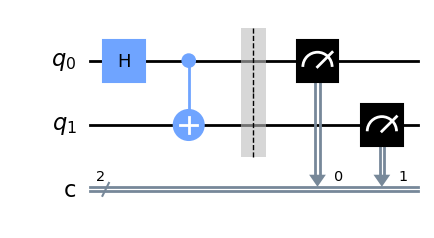

In [43]:
qc.draw(output='mpl')

For small circuits, it can be very usefull to "draw" the circuit while you build it: 

`.draw()` accept `output=` styles : mpl, latex, latex_source, text(=default), ...

Before we execute, we need to make sure we perform a measurement at the end: 

Now we have a circuit, we are ready for execution , we still need : 
    
- to import `execute()` method,



- to decide where we want the circtui to be executed, we will call this a backend, it can be : the local simulator included with the qiskit library `qasm_simulator`, a simulator on the Cloud : `ibmq_qasm_simulator`or a real physical device on IBM Cloud as well, such as `ibmq_athens`. 

Let's first use the local simulator, for this we need to import Aer for simulator functions


   

### 2. Executing on local simulator

In [50]:
from qiskit import Aer

#print(Aer.backends()) #, nicer printout below:
backend_list  = Aer.backends()
for be in backend_list:
    print(be)


AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


In [51]:
from qiskit import execute

For now, we want to use `qasm_simulator` which emulates a physical backend, so let's get it : 

In [52]:
backend = Aer.get_backend('qasm_simulator')

Now let's create our "job" to execute, `.execute()` requires that we pass the circuit and the backend (there are a number of optionnal argument, we will discuss "shots" soon : 

In [53]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

In [54]:
job = execute(qc,backend,shots=1024)


In [55]:
print(job)

Extracting results

In [56]:
my_results = job.result()

In [65]:
print(my_results)

Result(backend_name='qasm_simulator', backend_version='0.13.1', qobj_id='', job_id='c8649121-4a15-4027-8c82-1e71a34f54ec', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 527, '0x3': 497}), header=QobjExperimentHeader(creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-173', qreg_sizes=[['q', 2]], metadata={}), status=DONE, seed_simulator=1499615421, metadata={'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0011437, 'sample_measure_time': 0.0004802, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 32456, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 32, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}, time_taken=0.0011437)], date=2024-01

Reading results :

In [67]:
print(my_results.get_counts())

{'00': 527, '11': 497}


notes : 
- results are stored in a Python dictionnary, keys are the measurement basis, values are the number of times the measurement collapsed to that particular basis.
- the circuit has been run 1024 time, this is the default value for the keword parameter `shots`in `.execute()`. 

You can try values from `shots=1` to `shots=8192`

In [69]:
# with shots=1, you will get a count of 1 either on 00 or on 11
job = execute(qc,backend, shots=100)
my_results = job.result()
print(my_results.get_counts(qc))

{'00': 499688, '11': 500312}


It is also usefull to be able to visualize the results on a bar chart : 

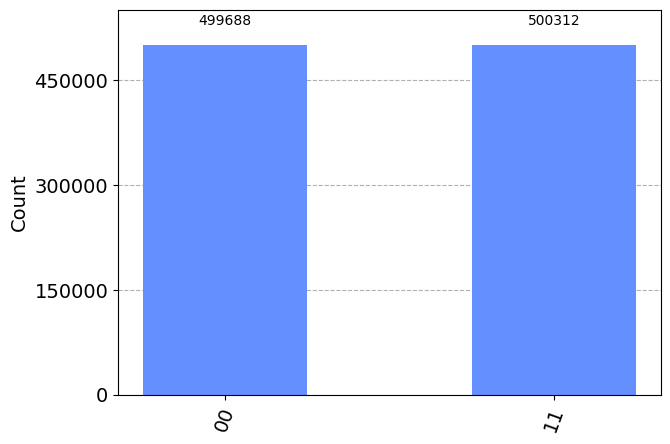

In [70]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(my_results.get_counts(qc))

On more thing about reading results. We get used to enumerate qubits from top to bottom of a circuit, $q_0, q_1, ... , q_n$. The measurement will code multiple qubits in a binary register this way $q_n,..., q_1, q0$, in other words $q_0$ is the least significant bit. 


Let's see the following experiment, using $X$ (not) and $id$ (identity):  

c:\Users\Tristan Gonçalves\Documents\ENSC 3A\Quantum Week\Quantum_computing_IBM_ENSC\.venv\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


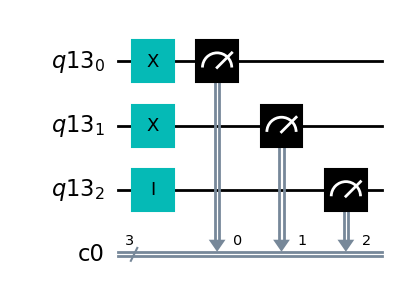

In [71]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)


qc.x(qr[0])
qc.x(qr[1])
qc.id(qr[2])

qc.measure(qr,cr)
qc.draw(output='mpl')

In this case we will measure a state correspondding to $q_0 = 1$ and $q_1= 0$, in the form $q_1q_0 = 01$

In [72]:
# with shots=1, you will get a count of 1 either on 00 or on 11
job = execute(qc,backend, shots=1024)
my_results = job.result()
print(my_results.get_counts(qc))

{'011': 1024}


### 3. Executing on statevector_simulator 

In [73]:
import numpy as np

from qiskit import Aer, QuantumCircuit, execute

from qiskit.visualization import plot_histogram, plot_state_qsphere

from qiskit.quantum_info import Statevector
from IPython.display import display, Math, Latex


In [74]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)

qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [75]:
sv = Statevector.from_label('00')
sv = sv.evolve(qc)


In [76]:
sv.data

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

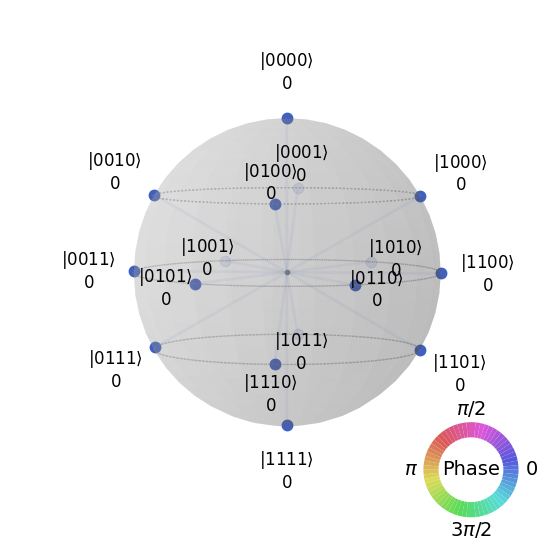

In [77]:

qc = QuantumCircuit(4)

qc.h(0)
qc.h(1)
qc.h(2)
qc.h(3)


qc.draw()

sv = Statevector.from_label('0'*4)
sv = sv.evolve(qc)

plot_state_qsphere(sv.data, show_state_labels=True, show_state_phases=True) 

In [78]:
sv.data

array([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
       0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j])

### 4. Executing on a physical backend

Let's restart with the Bell State circuit 

Make sure you have installed qiskit_ibm_provider (pip install) 

In [108]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute

qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

`qc` is ready !

In [109]:
from qiskit_ibm_provider import IBMProvider, least_busy
from my_token import MY_TOKEN

# Get the API token in https://quantum-computing.ibm.com/account
provider = IBMProvider(token=MY_TOKEN)

#backend = provider.get_backend("simulator_statevector")
least_busy_backend = least_busy(provider.backends())
backend = provider.get_backend(least_busy_backend.name)

# Build circuit


# Transpile circuit
from qiskit import transpile
transpiled_circuit = transpile(qc, backend)


# Run the circuit and get result
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
print(counts)

{'00': 1981, '11': 2019}
